# This is the Juypter Notebook containing simulations for the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [3]:
import bivirus
import numpy as np

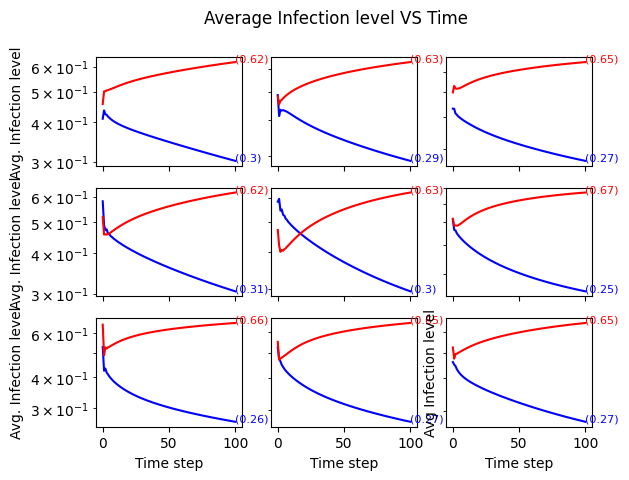

In [ ]:
config = bivirus.SimulationConfig(N=20, h=0.1, W=2, iterations=100,
                                seed = 42)
                            #   seed=1669509115)
B, delta = bivirus.random_parameters(config)

x1_avg_histories = []
x2_avg_histories = []

for _ in range(9):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1, config.N)
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories)

In [ ]:
# Experiment 1: completely random data
def random_exp():

    # this makes sure B^l is non zero and irreducible, satisfying assumptions 4 and 5
    A1, A2 = np.random.uniform(0, W, (N, N)), np.random.uniform(0, W, (N, N))
    # A = np.random.uniform(0, W, (N, N)) # each weight greater than 0. Note that the network must be connected

    delta_1 = []
    delta_2 = []
    beta_1 = []
    beta_2 = []
    for i in range(N):
        # sum_a6 = np.random.uniform(0, 10)
        sum_a6 = 8
        delta_bound = np.random.uniform(0, sum_a6)
        beta_bound = sum_a6 - delta_bound

        delta_1.append(np.random.uniform(0, delta_bound / 10))
        delta_2.append(np.random.uniform(0, delta_bound / 8))

        beta_1_bound = np.random.uniform(0, beta_bound / 6)
        beta_1.append(np.random.uniform(0, beta_1_bound / (np.sum(A1[i]))))
        beta_2.append(np.random.uniform(0, (beta_bound - beta_1_bound) / (np.sum(A2[i]))))

        # beta_1.append(np.random.uniform(0, beta_bound / 40))
        # beta_2.append(np.random.uniform(0, beta_bound / 40))
    
    delta_1 = np.array(delta_1)
    delta_2 = np.array(delta_2)
    beta_1 = np.array(beta_1)
    beta_2 = np.array(beta_2)

    B1 = np.diag(beta_1) @ A1
    B2 = np.diag(beta_2) @ A2

    # just to double check
    print('delta1 is '+str(delta_1))
    print('delta2 is '+str(delta_2))
    print('beta1 is '+ str(beta_1))
    print('beta2 is ' + str(beta_2))
    
    for i in range(N):
        s = delta_1[i]
        for j in range(N):
            s += B1[i, j] + B2[i, j]
        if s > 10:
            print('assumption 6 violated') 

    for i in range(N):
        s = delta_2[i]
        for j in range(N):
            s += B1[i, j] + B2[i, j]
        if s > 10:
            print('assumption 6 violated')

    return [A1, A2], [B1, B2], [beta_1, beta_2], [delta_1, delta_2]


A, B, beta, delta = random_exp()

# check for assumption 2
if delta[0].any() < 0 or delta[1].any() < 0 or B[0].any() < 0 or B[1].any() < 0:
    print('assumption 2 violated')

# # init conditions
# x1x2sum = np.random.uniform(0, 1, N)
# x1 = np.random.uniform(0, x1x2sum, N)
# x2 = x1x2sum - x1

# running the simulation
x1_avg_histories = []
x2_avg_histories = []
x1 = np.random.uniform(0, 1, N)
x2 = np.random.uniform(0, 1, N)
for num1 in [0.25, 0.50, 0.75]:
    num2bound = 1 - num1
    num2list = [num2bound * (i + 1) / 4 for i in range(3)]
    for num2 in num2list:

        # check assumption 1
        if num1 < 0 or num1 > 1 or num2 < 0 or num2 > 1 or 1 - num1 - num2 < 0 or 1 - num1 - num2 > 1:
            print('assumption 1 violated')
        
        x1.fill(num1)
        x2.fill(num2)
        print('x1 is '+str(x1))
        print('x2 is ' + str(x2))
        label, spectral_radius_1, spectral_radius_2, x1_avg_history, x2_avg_history, det_radius_1, det_radius_2 = run_simulation(x1, x2, B, delta)
        x1_avg_histories.append(x1_avg_history)
        x2_avg_histories.append(x2_avg_history)

plot_simulation(x1_avg_histories, x2_avg_histories) 

In [ ]:
# # ------------------------------------------------------------------------------------------------------------
# def run_and_save(num_of_exp: int, generation_func, output_file):
#     labels, spectral_radii_1, equilibria_1, spectral_radii_2, equilibria_2, validation, anomalies = list(), list(), list(), list(), list(), list(), list()
#     for _ in range(num_of_exp):
#         B_1, delta_1 = generation_func()
#         B_2, delta_2 = generation_func()
#         B = [B_1, B_2]
#         delta = [delta_1, delta_2]
#         spectral_radius_1, spectral_radius_2, x1_history, x2_history = run_simulation(B, delta)
        
#         equilibrium_1 = x1_history[-1]
#         equilibrium_2 = x2_history[-1]
#         spectral_radii_1.append(spectral_radius_1)
#         spectral_radii_2.append(spectral_radius_2)
#         equilibria_1.append(equilibrium_1)
#         equilibria_2.append(equilibrium_2)

#         if label == 2:
#             flag = True
#             for x in equilibrium_1:
#                 if abs(x) > ZERO_BOUND:
#                     flag = False
#             for x in equilibrium_2:
#                 if abs(x) > ZERO_BOUND:
#                     flag = False
#             validation.append(flag)
#         elif label == 5:
#             validation.append(None)
#         elif label == 4.1:
#             validation.append(None)
#         elif label == 4.2:
#             validation.append(None)
#         elif label == 4.3:
#             validation.append(None)
#         elif label == 4.4:
#             validation.append(None)
#         elif label == 3.1:
#             # x_2 is supposed to die out and x_1 is supposed to survive
#             flag_1 = True
#             for x in equilibrium_1:
#                 flag_1 = flag_1 and (abs(x) > ZERO_BOUND) # flag_1 false if there exists a single zero
#             flag_2 = True
#             for x in equilibrium_2:
#                 if abs(x) > ZERO_BOUND:
#                     flag = False # flag_2 false if there exists a non-zero element
#             validation.append(flag_1 and flag_2)
#         elif label == 3.2:
#             # x_1 is supposed to die out and x_2 is supposed to survive
#             flag_1 = True
#             for x in equilibrium_1:
#                 if abs(x) > ZERO_BOUND:
#                     flag = False # flag_1 false if there exists a non-zero element
#             flag_2 = True
#             for x in equilibrium_2:
#                 flag_2 = flag_2 and (abs(x) > ZERO_BOUND) # flag_2 false if there exists a single zero
#             validation.append(flag_1 and flag_2)

#     df = pd.DataFrame({
#         'label': labels,
#         'spectral_radius_1': spectral_radii_1,
#         'spectral_radius_2': spectral_radii_2,
#         'equilibrium_1': equilibria_1,
#         'equilibrium_2': equilibria_2,
#         'validation': validation
#     })

#     output_dir = os.path.dirname(output_file)
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     df.to_csv(output_file, index=False)
#     print(f'Simulation results saved to {output_file}')

#     return anomalies

# num_of_exp = 1000
# # print(run_and_save(num_of_exp, random_exp, 'c:/Users/bloge/OneDrive/Documents/Rice/Research/Virus Simulation/bivirus_random_param_1000.csv'))
# # print(run_and_save(num_of_exp, same_beta, 'c:/Users/bloge/OneDrive/Documents/Rice/Research/Virus Simulation/same_beta_1000.csv'))
# # print(run_and_save(num_of_exp, same_delta, 'c:/Users/bloge/OneDrive/Documents/Rice/Research/Virus Simulation/same_delta_1000.csv'))